In [84]:
# Import packages

import pandas as pd 
import numpy as np 
import os
from bs4 import BeautifulSoup
import time
import requests
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import random
import scipy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

import pickle
from joblib import dump, load

import warnings

# Set certain settings for the notebook
pd.set_option("display.max_columns", None)

warnings.filterwarnings("ignore")

In [85]:
# Check current directory
os.getcwd()

'C:\\Users\\imacd_0odruq3\\Documents\\sports_gambling\\sports_gambling_algorithm'

In [3]:
# Read in data files

betting_lines = pd.read_csv('../data/betting_data_final')
game_probs = pd.read_csv('../data/games_with_preds.csv')

In [4]:
betting_lines

,Unnamed: 0,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Line Open,Home Line Close,Away Line Open,Away Line Close,Total Score Open,Total Score Close,Home Odds ML Open,Home Odds ML Close,Away Odds ML Open,Away Odds ML Close,Home Line Odds ML Open,Home Line Odds ML Close,Away Line Odds ML Open,Away Line Odds ML Close,Total Score Over ML Open,Total Score Over ML Close,Total Score Under ML Open,Total Score Under ML Close,Total Score,Open Over/Under Result,Closing Over/Under Result,Home Score Actual Line,Away Score Actual Line,Opening Winner,Closing Winner,Opening Winner Specific,Closing Winner Specific,Winner HA,Line Open Cover,Line Close Cover,Line Open Cover HA,Line Close Cover HA,Home ML Bet Return,Away ML Bet Return,Home Spread Bet Return,Away Spread Bet Return,Favorite ML Bet Return,Underdog ML Bet Return,Favorite Spread Bet Return,Underdog Spread Bet Return,implied_prob_home_open,implied_prob_away_open,implied_prob_home_close,implied_prob_away_close,total_implied_prob_open,total_implied_prob_close,week,season
0,0,2022-01-17,Los Angeles Rams,Arizona Cardinals,34,11,False,True,False,-4.5,-3.5,4.5,3.5,50.5,49.0,-200.0,-172.0,170.0,150.0,-111.0,100.0,-111.0,-120.0,-111.0,-111.0,-111.0,-111.0,45,Under,Under,-23,23,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,50.00,-100.0,90.09,-100.00,50.00,-100.0,90.09,-100.00,0.666667,0.370370,0.632353,0.400000,1.037037,1.032353,19,2021
1,1,2022-01-16,Kansas City Chiefs,Pittsburgh Steelers,42,21,False,True,False,-13.5,-12.5,13.5,12.5,46.5,47.0,-714.0,-833.0,500.0,550.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,63,Over,Over,-21,21,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,14.01,-100.0,90.09,-100.00,14.01,-100.0,90.09,-100.00,0.877150,0.166667,0.892819,0.153846,1.043817,1.046665,19,2021
2,2,2022-01-16,Dallas Cowboys,San Francisco 49ers,17,23,False,True,False,-3.0,-3.5,3.0,3.5,50.5,51.0,-161.0,-185.0,140.0,165.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,40,Under,Under,6,-6,Underdog,Underdog,Away Underdog,Away Underdog,Away,Underdog,Underdog,Away,Away,-100.00,140.0,-100.00,90.09,-100.00,140.0,-100.00,90.09,0.616858,0.416667,0.649123,0.377358,1.033525,1.026481,19,2021
3,3,2022-01-16,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,False,True,False,-8.5,-7.0,8.5,7.0,49.0,47.0,-400.0,-370.0,320.0,280.0,-111.0,-116.0,-111.0,-105.0,-111.0,-111.0,-111.0,-111.0,46,Under,Under,-16,16,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,25.00,-100.0,90.09,-100.00,25.00,-100.0,90.09,-100.00,0.800000,0.238095,0.787234,0.263158,1.038095,1.050392,19,2021
4,4,2022-01-15,Buffalo Bills,New England Patriots,47,17,False,True,False,-4.5,-4.5,4.5,4.5,43.5,43.0,-213.0,-222.0,175.0,180.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,64,Over,Over,-30,30,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,46.95,-100.0,90.09,-100.00,46.95,-100.0,90.09,-100.00,0.680511,0.363636,0.689441,0.357143,1.044148,1.046584,19,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2113,2014-09-07,New York Jets,Las Vegas Raiders,19,14,False,False,False,-5.0,-6.5,5.0,6.5,39.5,41.0,-235.0,-279.0,210.0,246.0,-105.0,-108.0,-105.0,-102.0,-109.0,-105.0,-101.0,-105.0,33,Under,Under,-5,5,Favorite,Favorite,Home Favorite,Home Favorite,Home,Push,Underdog,Push,Away,42.55,-100.0,0.00,0.00,42.55,-100.0,0.00,0.00,0.701493,0.322581,0.736148,0.289017,1.024073,1.025165,1,2014
2114,2114,2014-09-07,Philadelphia Eagles,Jacksonville Jaguars,34,17,False,False,False,-10.0,-10.0,10.0,10.0,53.0,49.0,-500.0,-515.0,423.0,435.0,-110.0,102.0,100.0,-113.0,-105.0,-110.0,-105.0,100.0,51,Under,Over,-17,17,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,

In [5]:
game_probs.head(50)

,Unnamed: 0,season,week,home_x,away_x,home_score,away_score,total_score,winner,home_win,home_win_pred,prediction_correct,pick_confidence,home_win_prob,away_win_prob,qbelo_prob1,qbelo_prob2,elo_home_win,elo_correct,elo_confidence
0,0,2021,19,Los Angeles Rams,Arizona Cardinals,34,11,45,Home,1,1,1,0.621341,0.621341,0.378659,0.702535,0.297465,1,1,0.702535
1,1,2021,19,Kansas City Chiefs,Pittsburgh Steelers,42,21,63,Home,1,1,1,0.774682,0.774682,0.225318,0.858473,0.141527,1,1,0.858473
2,2,2021,19,Dallas Cowboys,San Francisco 49ers,17,23,40,Away,0,1,0,0.720499,0.720499,0.279501,0.690316,0.309684,1,0,0.690316
3,3,2021,19,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,46,Home,1,1,1,0.616480,0.616480,0.383520,0.805219,0.194781,1,1,0.805219
4,4,2021,19,Buffalo Bills,New England Patriots,47,17,64,Home,1,1,1,0.792162,0.792161,0.207838,0.700099,0.299901,1,1,0.700099
5,5,2021,19,Cincinnati Bengals,Las Vegas Raiders,26,19,45,Home,1,0,0,0.668069,0.331931,0.668069,0.740618,0.259382,1,1,0.740618
6,6,2021,18,Las Vegas Raiders,Los Angeles Chargers,35,32,67,Home,1,0,0,0.731019,0.268981,0.731019,0.489497,0.510503,0,0,0.510503
7,7,2021,18,Arizona Cardinals,Seattle Seahawks,30,38,68,Away,0,1,0,0.662763,0.662763,0.337237,0.674070,0.325930,1,0,0.674070
8,8,2021,18,Los Angeles Rams,San Francisco 49ers,24,27,51,Away,0,1,0,0.547584,0.547584,0.452416,0.655596,0.344404,1,0,0.655596
9,9,2021,18,Atlanta Falcons,New Orleans Saints,20,30,50,Away,0,1,0,0.718530,0.718530,0.281470,0.405590,0.594410,0,1,0.594410


In [27]:
# Functions:
# get_prob_advantage returns two values, the best probability gap for the game, as well as the team given the advantage
# by the probability gap
# place_bet_100 returns True or False based on a given threshold: any team with a probability advantage higher than 
# threshold will have a 100 dollar bet placed on them

def get_prob_advantage_elo(game):
    advantage_home = game['qbelo_prob1'] - game['implied_prob_home_open']
    advantage_away = game['qbelo_prob2'] - game['implied_prob_away_open']
    
    if advantage_home > advantage_away:
        return advantage_home, 'home'
    else:
        return advantage_away, 'away'
    
def place_bet_100_elo(game, threshold):
    if game['best_prob_advantage_elo'] >= threshold:
        return True
    else:
        return False
    
def get_prob_advantage_algo(game):
    advantage_home = game['home_win_prob'] - game['implied_prob_home_open']
    advantage_away = game['away_win_prob'] - game['implied_prob_away_open']
    
    if advantage_home > advantage_away:
        return advantage_home, 'home'
    else:
        return advantage_away, 'away'
    
def place_bet_100_algo(game, threshold):
    if game['best_prob_advantage_algo'] >= threshold:
        return True
    else:
        return False
    
def get_return_100_elo(game):
    if game.advantage_team_elo == 'home':
        return game['Home ML Bet Return']
    else:
        return game['Away ML Bet Return']
    
def get_return_100_algo(game):
    if game.advantage_team_algo == 'home':
        return game['Home ML Bet Return']
    else:
        return game['Away ML Bet Return']
    
def get_return_100_random(game):
    if random.random() <= .5:
        return game['Home ML Bet Return']
    else:
        return game['Away ML Bet Return']

In [7]:
# Combine data frames 

gambling_df = betting_lines.merge(game_probs, left_on=['season', 'week', 'Home Team', 'Away Team'],
                                 right_on=['season', 'week', 'home_x', 'away_x'])
gambling_df = gambling_df.join(pd.DataFrame(gambling_df.apply(lambda x: get_prob_advantage_elo(x), axis=1).tolist(), columns=['best_prob_advantage_elo', 'advantage_team_elo']))
gambling_df = gambling_df.join(pd.DataFrame(gambling_df.apply(lambda x: get_prob_advantage_algo(x), axis=1).tolist(), columns=['best_prob_advantage_algo', 'advantage_team_algo']))
gambling_df

,Unnamed: 0_x,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Line Open,Home Line Close,Away Line Open,Away Line Close,Total Score Open,Total Score Close,Home Odds ML Open,Home Odds ML Close,Away Odds ML Open,Away Odds ML Close,Home Line Odds ML Open,Home Line Odds ML Close,Away Line Odds ML Open,Away Line Odds ML Close,Total Score Over ML Open,Total Score Over ML Close,Total Score Under ML Open,Total Score Under ML Close,Total Score,Open Over/Under Result,Closing Over/Under Result,Home Score Actual Line,Away Score Actual Line,Opening Winner,Closing Winner,Opening Winner Specific,Closing Winner Specific,Winner HA,Line Open Cover,Line Close Cover,Line Open Cover HA,Line Close Cover HA,Home ML Bet Return,Away ML Bet Return,Home Spread Bet Return,Away Spread Bet Return,Favorite ML Bet Return,Underdog ML Bet Return,Favorite Spread Bet Return,Underdog Spread Bet Return,implied_prob_home_open,implied_prob_away_open,implied_prob_home_close,implied_prob_away_close,total_implied_prob_open,total_implied_prob_close,week,season,Unnamed: 0_y,home_x,away_x,home_score,away_score,total_score,winner,home_win,home_win_pred,prediction_correct,pick_confidence,home_win_prob,away_win_prob,qbelo_prob1,qbelo_prob2,elo_home_win,elo_correct,elo_confidence,best_prob_advantage_elo,advantage_team_elo,best_prob_advantage_algo,advantage_team_algo
0,0,2022-01-17,Los Angeles Rams,Arizona Cardinals,34,11,False,True,False,-4.5,-3.5,4.5,3.5,50.5,49.0,-200.0,-172.0,170.0,150.0,-111.0,100.0,-111.0,-120.0,-111.0,-111.0,-111.0,-111.0,45,Under,Under,-23,23,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,50.00,-100.00,90.09,-100.00,50.00,-100.0,90.09,-100.00,0.666667,0.370370,0.632353,0.400000,1.037037,1.032353,19,2021,0,Los Angeles Rams,Arizona Cardinals,34,11,45,Home,1,1,1,0.621341,0.621341,0.378659,0.702535,0.297465,1,1,0.702535,0.035868,home,0.008288,away
1,1,2022-01-16,Kansas City Chiefs,Pittsburgh Steelers,42,21,False,True,False,-13.5,-12.5,13.5,12.5,46.5,47.0,-714.0,-833.0,500.0,550.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,63,Over,Over,-21,21,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,14.01,-100.00,90.09,-100.00,14.01,-100.0,90.09,-100.00,0.877150,0.166667,0.892819,0.153846,1.043817,1.046665,19,2021,1,Kansas City Chiefs,Pittsburgh Steelers,42,21,63,Home,1,1,1,0.774682,0.774682,0.225318,0.858473,0.141527,1,1,0.858473,-0.018677,home,0.058652,away
2,2,2022-01-16,Dallas Cowboys,San Francisco 49ers,17,23,False,True,False,-3.0,-3.5,3.0,3.5,50.5,51.0,-161.0,-185.0,140.0,165.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,40,Under,Under,6,-6,Underdog,Underdog,Away Underdog,Away Underdog,Away,Underdog,Underdog,Away,Away,-100.00,140.00,-100.00,90.09,-100.00,140.0,-100.00,90.09,0.616858,0.416667,0.649123,0.377358,1.033525,1.026481,19,2021,2,Dallas Cowboys,San Francisco 49ers,17,23,40,Away,0,1,0,0.720499,0.720499,0.279501,0.690316,0.309684,1,0,0.690316,0.073458,home,0.103641,home
3,3,2022-01-16,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,False,True,False,-8.5,-7.0,8.5,7.0,49.0,47.0,-400.0,-370.0,320.0,280.0,-111.0,-116.0,-111.0,-105.0,-111.0,-111.0,-111.0,-111.0,46,Under,Under,-16,16,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,25.00,-100.00,90.09,-100.00,25.00,-100.0,90.09,-100.00,0.800000,0.238095,0.787234,0.263158,1.038095,1.050392,19,2021,3,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,46,Home,1,1,1,0.616480,0.616480,0.383520,0.805219,0.194781,1,1,0.805219,0.005219,home,0.145425,away
4,4,2022-01-15,Buffalo Bills,New England Patriots,47,17,False,True,False,-4.5,-4.5,4.5,4.5,43.5,43.0,-213.0,-222.0,175.0,180.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,64,Over,Over,-30,30,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,46.95,-100.00,90.09,-100.00,46.95,-100.0,90.09,-100.00,0.680511,0.363636,0.689441,0.357143,1.044148,1.046584,19,2021,4,Buffalo Bills,New En

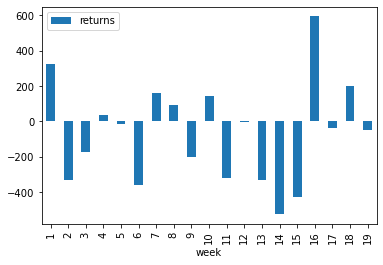

In [8]:
# Check returns from above method for elo

bets_100_03_elo = gambling_df.copy()
bets_100_03_elo['place_bet_100_elo'] = bets_100_03_elo.apply(lambda x: place_bet_100_elo(x, threshold=.03), axis=1)
bets_100_03_elo = bets_100_03_elo[bets_100_03_elo.place_bet_100_elo == True]
bets_100_03_elo['returns'] = bets_100_03_elo.apply(lambda x: get_return_100_elo(x), axis=1)
bets_100_03_elo.groupby(by=['week']).sum()['returns'].reset_index().plot.bar(x='week', y='returns')

In [9]:
bets_100_03_elo.sum()['returns']

-1213.41

In [10]:
bets_100_03_elo

,Unnamed: 0_x,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Line Open,Home Line Close,Away Line Open,Away Line Close,Total Score Open,Total Score Close,Home Odds ML Open,Home Odds ML Close,Away Odds ML Open,Away Odds ML Close,Home Line Odds ML Open,Home Line Odds ML Close,Away Line Odds ML Open,Away Line Odds ML Close,Total Score Over ML Open,Total Score Over ML Close,Total Score Under ML Open,Total Score Under ML Close,Total Score,Open Over/Under Result,Closing Over/Under Result,Home Score Actual Line,Away Score Actual Line,Opening Winner,Closing Winner,Opening Winner Specific,Closing Winner Specific,Winner HA,Line Open Cover,Line Close Cover,Line Open Cover HA,Line Close Cover HA,Home ML Bet Return,Away ML Bet Return,Home Spread Bet Return,Away Spread Bet Return,Favorite ML Bet Return,Underdog ML Bet Return,Favorite Spread Bet Return,Underdog Spread Bet Return,implied_prob_home_open,implied_prob_away_open,implied_prob_home_close,implied_prob_away_close,total_implied_prob_open,total_implied_prob_close,week,season,Unnamed: 0_y,home_x,away_x,home_score,away_score,total_score,winner,home_win,home_win_pred,prediction_correct,pick_confidence,home_win_prob,away_win_prob,qbelo_prob1,qbelo_prob2,elo_home_win,elo_correct,elo_confidence,best_prob_advantage_elo,advantage_team_elo,best_prob_advantage_algo,advantage_team_algo,place_bet_100_elo,returns
0,0,2022-01-17,Los Angeles Rams,Arizona Cardinals,34,11,False,True,False,-4.5,-3.5,4.5,3.5,50.5,49.0,-200.0,-172.0,170.0,150.0,-111.0,100.0,-111.0,-120.0,-111.0,-111.0,-111.0,-111.0,45,Under,Under,-23,23,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,50.0,-100.00,90.09,-100.00,50.00,-100.0,90.09,-100.00,0.666667,0.370370,0.632353,0.400000,1.037037,1.032353,19,2021,0,Los Angeles Rams,Arizona Cardinals,34,11,45,Home,1,1,1,0.621341,0.621341,0.378659,0.702535,0.297465,1,1,0.702535,0.035868,home,0.008288,away,True,50.0
2,2,2022-01-16,Dallas Cowboys,San Francisco 49ers,17,23,False,True,False,-3.0,-3.5,3.0,3.5,50.5,51.0,-161.0,-185.0,140.0,165.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,40,Under,Under,6,-6,Underdog,Underdog,Away Underdog,Away Underdog,Away,Underdog,Underdog,Away,Away,-100.0,140.00,-100.00,90.09,-100.00,140.0,-100.00,90.09,0.616858,0.416667,0.649123,0.377358,1.033525,1.026481,19,2021,2,Dallas Cowboys,San Francisco 49ers,17,23,40,Away,0,1,0,0.720499,0.720499,0.279501,0.690316,0.309684,1,0,0.690316,0.073458,home,0.103641,home,True,-100.0
6,6,2022-01-09,Las Vegas Raiders,Los Angeles Chargers,35,32,True,False,False,2.5,3.0,-2.5,-3.0,48.5,49.5,130.0,150.0,-152.0,-172.0,-111.0,-105.0,-111.0,-116.0,-111.0,-111.0,-111.0,-111.0,67,Over,Over,-3,3,Underdog,Underdog,Home Underdog,Home Underdog,Home,Underdog,Underdog,Home,Home,130.0,-100.00,90.09,-100.00,-100.00,130.0,-100.00,90.09,0.434783,0.603175,0.400000,0.632353,1.037957,1.032353,18,2021,6,Las Vegas Raiders,Los Angeles Chargers,35,32,67,Home,1,0,0,0.731019,0.268981,0.731019,0.489497,0.510503,0,0,0.510503,0.054715,home,0.127845,away,True,130.0
9,9,2022-01-09,Atlanta Falcons,New Orleans Saints,20,30,False,False,False,4.0,4.5,-4.0,-4.5,40.0,40.0,175.0,175.0,-213.0,-213.0,100.0,-111.0,-120.0,-111.0,-105.0,-111.0,-116.0,-111.0,50,Over,Over,10,-10,Favorite,Favorite,Away Favorite,Away Favorite,Away,Favorite,Favorite,Away,Away,-100.0,46.95,-100.00,83.33,46.95,-100.0,83.33,-100.00,0.363636,0.680511,0.363636,0.680511,1.044148,1.044148,18,2021,9,Atlanta Falcons,New Orleans Saints,20,30,50,Away,0,1,0,0.718530,0.718530,0.281470,0.405590,0.594410,0,1,0.594410,0.041953,home,0.354893,home,True,-100.0
10,10,2022-01-09,Baltimore Ravens,Pittsburgh Steelers,13,16,True,False,False,-5.0,-3.0,5.0,3.0,42.0,41.0,-213.0,-161.0,175.0,140.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,29,Under,Under,3,-3,Underdog,Underdog,Away Underdog,Away Underdog,Away,Underdog,Underdog,Away,Away,-100.0,175.00,-100.00,90.09,-100.00,175.0,-100.00,90.09,0.680511,0.363636,0.616858,0.41

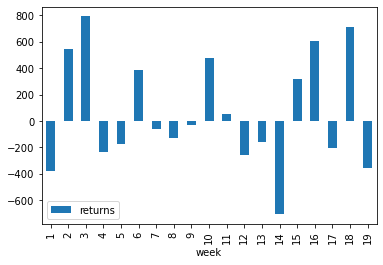

In [11]:
# Check returns from above method for algo

bets_100_03_algo = gambling_df.copy()
bets_100_03_algo['place_bet_100_algo'] = bets_100_03_algo.apply(lambda x: place_bet_100_algo(x, threshold=.03), axis=1)
bets_100_03_algo = bets_100_03_algo[bets_100_03_algo.place_bet_100_algo == True]
bets_100_03_algo['returns'] = bets_100_03_algo.apply(lambda x: get_return_100_algo(x), axis=1)
bets_100_03_algo.groupby(by=['week']).sum()['returns'].reset_index().plot.bar(x='week', y='returns')

In [12]:
bets_100_03_algo.sum()['returns']

1205.7399999999998

In [49]:
len(bets_100_03_algo)

171

In [20]:
bets_100_03_algo.mean()['returns']

7.051111111111114

In [21]:
bets_100_03_algo.std()['returns']

139.5198885440582

In [16]:
bets_100_03_algo.head(50)

,Unnamed: 0_x,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Line Open,Home Line Close,Away Line Open,Away Line Close,Total Score Open,Total Score Close,Home Odds ML Open,Home Odds ML Close,Away Odds ML Open,Away Odds ML Close,Home Line Odds ML Open,Home Line Odds ML Close,Away Line Odds ML Open,Away Line Odds ML Close,Total Score Over ML Open,Total Score Over ML Close,Total Score Under ML Open,Total Score Under ML Close,Total Score,Open Over/Under Result,Closing Over/Under Result,Home Score Actual Line,Away Score Actual Line,Opening Winner,Closing Winner,Opening Winner Specific,Closing Winner Specific,Winner HA,Line Open Cover,Line Close Cover,Line Open Cover HA,Line Close Cover HA,Home ML Bet Return,Away ML Bet Return,Home Spread Bet Return,Away Spread Bet Return,Favorite ML Bet Return,Underdog ML Bet Return,Favorite Spread Bet Return,Underdog Spread Bet Return,implied_prob_home_open,implied_prob_away_open,implied_prob_home_close,implied_prob_away_close,total_implied_prob_open,total_implied_prob_close,week,season,Unnamed: 0_y,home_x,away_x,home_score,away_score,total_score,winner,home_win,home_win_pred,prediction_correct,pick_confidence,home_win_prob,away_win_prob,qbelo_prob1,qbelo_prob2,elo_home_win,elo_correct,elo_confidence,best_prob_advantage_elo,advantage_team_elo,best_prob_advantage_algo,advantage_team_algo,place_bet_100_algo,returns
1,1,2022-01-16,Kansas City Chiefs,Pittsburgh Steelers,42,21,False,True,False,-13.5,-12.5,13.5,12.5,46.5,47.0,-714.0,-833.0,500.0,550.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,63,Over,Over,-21,21,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,14.01,-100.00,90.09,-100.00,14.01,-100.00,90.09,-100.00,0.877150,0.166667,0.892819,0.153846,1.043817,1.046665,19,2021,1,Kansas City Chiefs,Pittsburgh Steelers,42,21,63,Home,1,1,1,0.774682,0.774682,0.225318,0.858473,0.141527,1,1,0.858473,-0.018677,home,0.058652,away,True,-100.00
2,2,2022-01-16,Dallas Cowboys,San Francisco 49ers,17,23,False,True,False,-3.0,-3.5,3.0,3.5,50.5,51.0,-161.0,-185.0,140.0,165.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,40,Under,Under,6,-6,Underdog,Underdog,Away Underdog,Away Underdog,Away,Underdog,Underdog,Away,Away,-100.00,140.00,-100.00,90.09,-100.00,140.00,-100.00,90.09,0.616858,0.416667,0.649123,0.377358,1.033525,1.026481,19,2021,2,Dallas Cowboys,San Francisco 49ers,17,23,40,Away,0,1,0,0.720499,0.720499,0.279501,0.690316,0.309684,1,0,0.690316,0.073458,home,0.103641,home,True,-100.00
3,3,2022-01-16,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,False,True,False,-8.5,-7.0,8.5,7.0,49.0,47.0,-400.0,-370.0,320.0,280.0,-111.0,-116.0,-111.0,-105.0,-111.0,-111.0,-111.0,-111.0,46,Under,Under,-16,16,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,25.00,-100.00,90.09,-100.00,25.00,-100.00,90.09,-100.00,0.800000,0.238095,0.787234,0.263158,1.038095,1.050392,19,2021,3,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,46,Home,1,1,1,0.616480,0.616480,0.383520,0.805219,0.194781,1,1,0.805219,0.005219,home,0.145425,away,True,-100.00
4,4,2022-01-15,Buffalo Bills,New England Patriots,47,17,False,True,False,-4.5,-4.5,4.5,4.5,43.5,43.0,-213.0,-222.0,175.0,180.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,64,Over,Over,-30,30,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,46.95,-100.00,90.09,-100.00,46.95,-100.00,90.09,-100.00,0.680511,0.363636,0.689441,0.357143,1.044148,1.046584,19,2021,4,Buffalo Bills,New England Patriots,47,17,64,Home,1,1,1,0.792162,0.792161,0.207838,0.700099,0.299901,1,1,0.700099,0.019588,home,0.111650,home,True,46.95
5,5,2022-01-15,Cincinnati Bengals,Las Vegas Raiders,26,19,False,True,False,-6.5,-6.0,6.5,6.0,48.5,48.5,-270.0,-263.0,220.0,215.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,45,Under,Under,-7,7,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,37.04,-100.00,90.09,-100.00,37.04,-100.00,90.09,-100.00,0

Average Random Return: -381.24786


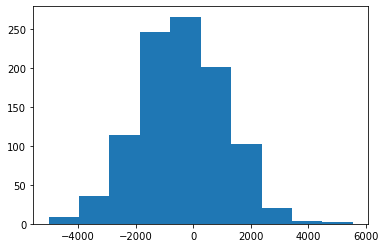

In [36]:
# Check winnings from random betting model

total_return_list = []
simulations = 10000

for i in range(simulations):
    gambling_sample = gambling_df.sample(frac=.65)
    gambling_sample['return'] = gambling_sample.apply(lambda x: get_return_100_random(x), axis=1)
    total_return_list.append(gambling_sample.sum()['return'])

print('Average Random Return: {}'.format(np.mean(total_return_list)))

plt.plot()
plt.hist(total_return_list)
plt.show()

In [46]:
# Check where algorithm would have fallen in terms of random guessing percentile

break_even_percentile = scipy.stats.percentileofscore(total_return_list, 0)
approx_algo_winnings = 1200
algo_percentile = scipy.stats.percentileofscore(total_return_list, approx_algo_winnings)

print('Percentile of breaking even: {}'.format(break_even_percentile))

print('Percentile of algorithm winnings: {}'.format(algo_percentile))

Percentile of breaking even: 59.7
Percentile of algorithm winnings: 85.1


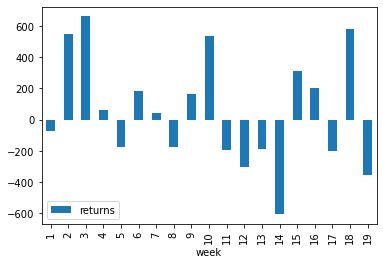

In [47]:
# Check returns from above method for algo with higher threshold

bets_100_05_algo = gambling_df.copy()
bets_100_05_algo['place_bet_100_algo'] = bets_100_05_algo.apply(lambda x: place_bet_100_algo(x, threshold=.05), axis=1)
bets_100_05_algo = bets_100_05_algo[bets_100_05_algo.place_bet_100_algo == True]
bets_100_05_algo['returns'] = bets_100_05_algo.apply(lambda x: get_return_100_algo(x), axis=1)
bets_100_05_algo.groupby(by=['week']).sum()['returns'].reset_index().plot.bar(x='week', y='returns')

In [48]:
bets_100_05_algo.sum()['returns']

1027.8600000000001

In [50]:
len(bets_100_05_algo)

147

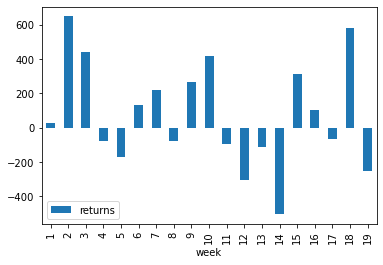

In [51]:
# Check returns from above method for algo with even higher threshold

bets_100_07_algo = gambling_df.copy()
bets_100_07_algo['place_bet_100_algo'] = bets_100_07_algo.apply(lambda x: place_bet_100_algo(x, threshold=.07), axis=1)
bets_100_07_algo = bets_100_07_algo[bets_100_07_algo.place_bet_100_algo == True]
bets_100_07_algo['returns'] = bets_100_07_algo.apply(lambda x: get_return_100_algo(x), axis=1)
bets_100_07_algo.groupby(by=['week']).sum()['returns'].reset_index().plot.bar(x='week', y='returns')

In [53]:
bets_100_07_algo.sum()['returns']

1474.8100000000002

In [54]:
len(bets_100_07_algo)

123

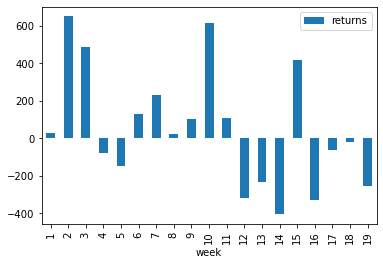

In [55]:
# Check returns from above method for algo with even higher threshold

bets_100_10_algo = gambling_df.copy()
bets_100_10_algo['place_bet_100_algo'] = bets_100_10_algo.apply(lambda x: place_bet_100_algo(x, threshold=.1), axis=1)
bets_100_10_algo = bets_100_10_algo[bets_100_10_algo.place_bet_100_algo == True]
bets_100_10_algo['returns'] = bets_100_10_algo.apply(lambda x: get_return_100_algo(x), axis=1)
bets_100_10_algo.groupby(by=['week']).sum()['returns'].reset_index().plot.bar(x='week', y='returns')

In [56]:
bets_100_10_algo.sum()['returns']

925.3900000000003

In [57]:
len(bets_100_10_algo)

98

Average Random Return: -265.530032


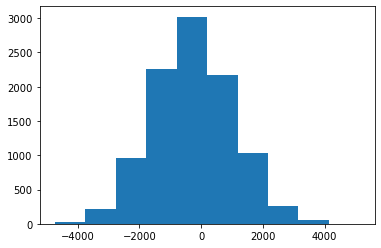

In [58]:
# Check winnings from random betting model, for .07

total_return_list = []
simulations = 10000

for i in range(simulations):
    gambling_sample = gambling_df.sample(n=125)
    gambling_sample['return'] = gambling_sample.apply(lambda x: get_return_100_random(x), axis=1)
    total_return_list.append(gambling_sample.sum()['return'])

print('Average Random Return: {}'.format(np.mean(total_return_list)))

plt.plot()
plt.hist(total_return_list)
plt.show()

In [60]:
# Check where algorithm would have fallen in terms of random guessing percentile, for .07 

break_even_percentile = scipy.stats.percentileofscore(total_return_list, 0)
approx_algo_winnings = 1470
algo_percentile = scipy.stats.percentileofscore(total_return_list, approx_algo_winnings)

print('Percentile of breaking even: {}'.format(break_even_percentile))

print('Percentile of algorithm winnings: {}'.format(algo_percentile))

Percentile of breaking even: 58.92
Percentile of algorithm winnings: 90.76


In [70]:
# Check winnings if there was a proportional betting algorithm

def get_return_proportional_algo(game):
    
    bet_weight = 0
    
    if .03 <= game.best_prob_advantage_algo < .05:
        bet_weight = 1
    elif .05 <= game.best_prob_advantage_algo < .1:
        bet_weight = 2
    elif .1<= game.best_prob_advantage_algo < .15:
        bet_weight = 3
    elif .15 <= game.best_prob_advantage_algo < .2:
        bet_weight = 4
    elif game.best_prob_advantage_algo >= .2 :
        bet_weight = 5
        
    if game.advantage_team_algo == 'home':
        return bet_weight * game['Home ML Bet Return'], bet_weight * 100
    else:
        return bet_weight * game['Away ML Bet Return'], bet_weight * 100

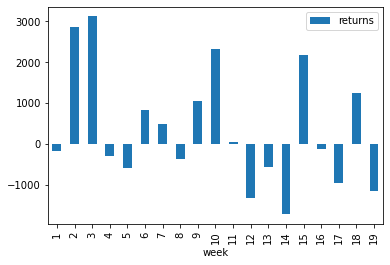

In [73]:
# Check returns for algo with proportional betting 

bets_prop_algo = gambling_df.copy()
bets_prop_algo[['returns', 'wagered']] = bets_prop_algo.apply(lambda x: get_return_proportional_algo(x), axis=1, result_type='expand')
bets_prop_algo.groupby(by=['week']).sum()['returns'].reset_index().plot.bar(x='week', y='returns')

In [76]:
bets_prop_algo.sum()[['wagered', 'returns']]

wagered    51700.0
returns    6758.59
dtype: object

In [77]:
bets_prop_algo

,Unnamed: 0_x,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Line Open,Home Line Close,Away Line Open,Away Line Close,Total Score Open,Total Score Close,Home Odds ML Open,Home Odds ML Close,Away Odds ML Open,Away Odds ML Close,Home Line Odds ML Open,Home Line Odds ML Close,Away Line Odds ML Open,Away Line Odds ML Close,Total Score Over ML Open,Total Score Over ML Close,Total Score Under ML Open,Total Score Under ML Close,Total Score,Open Over/Under Result,Closing Over/Under Result,Home Score Actual Line,Away Score Actual Line,Opening Winner,Closing Winner,Opening Winner Specific,Closing Winner Specific,Winner HA,Line Open Cover,Line Close Cover,Line Open Cover HA,Line Close Cover HA,Home ML Bet Return,Away ML Bet Return,Home Spread Bet Return,Away Spread Bet Return,Favorite ML Bet Return,Underdog ML Bet Return,Favorite Spread Bet Return,Underdog Spread Bet Return,implied_prob_home_open,implied_prob_away_open,implied_prob_home_close,implied_prob_away_close,total_implied_prob_open,total_implied_prob_close,week,season,Unnamed: 0_y,home_x,away_x,home_score,away_score,total_score,winner,home_win,home_win_pred,prediction_correct,pick_confidence,home_win_prob,away_win_prob,qbelo_prob1,qbelo_prob2,elo_home_win,elo_correct,elo_confidence,best_prob_advantage_elo,advantage_team_elo,best_prob_advantage_algo,advantage_team_algo,returns,wagered
0,0,2022-01-17,Los Angeles Rams,Arizona Cardinals,34,11,False,True,False,-4.5,-3.5,4.5,3.5,50.5,49.0,-200.0,-172.0,170.0,150.0,-111.0,100.0,-111.0,-120.0,-111.0,-111.0,-111.0,-111.0,45,Under,Under,-23,23,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,50.00,-100.00,90.09,-100.00,50.00,-100.0,90.09,-100.00,0.666667,0.370370,0.632353,0.400000,1.037037,1.032353,19,2021,0,Los Angeles Rams,Arizona Cardinals,34,11,45,Home,1,1,1,0.621341,0.621341,0.378659,0.702535,0.297465,1,1,0.702535,0.035868,home,0.008288,away,-0.00,0.0
1,1,2022-01-16,Kansas City Chiefs,Pittsburgh Steelers,42,21,False,True,False,-13.5,-12.5,13.5,12.5,46.5,47.0,-714.0,-833.0,500.0,550.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,63,Over,Over,-21,21,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,14.01,-100.00,90.09,-100.00,14.01,-100.0,90.09,-100.00,0.877150,0.166667,0.892819,0.153846,1.043817,1.046665,19,2021,1,Kansas City Chiefs,Pittsburgh Steelers,42,21,63,Home,1,1,1,0.774682,0.774682,0.225318,0.858473,0.141527,1,1,0.858473,-0.018677,home,0.058652,away,-200.00,200.0
2,2,2022-01-16,Dallas Cowboys,San Francisco 49ers,17,23,False,True,False,-3.0,-3.5,3.0,3.5,50.5,51.0,-161.0,-185.0,140.0,165.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,40,Under,Under,6,-6,Underdog,Underdog,Away Underdog,Away Underdog,Away,Underdog,Underdog,Away,Away,-100.00,140.00,-100.00,90.09,-100.00,140.0,-100.00,90.09,0.616858,0.416667,0.649123,0.377358,1.033525,1.026481,19,2021,2,Dallas Cowboys,San Francisco 49ers,17,23,40,Away,0,1,0,0.720499,0.720499,0.279501,0.690316,0.309684,1,0,0.690316,0.073458,home,0.103641,home,-300.00,300.0
3,3,2022-01-16,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,False,True,False,-8.5,-7.0,8.5,7.0,49.0,47.0,-400.0,-370.0,320.0,280.0,-111.0,-116.0,-111.0,-105.0,-111.0,-111.0,-111.0,-111.0,46,Under,Under,-16,16,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,25.00,-100.00,90.09,-100.00,25.00,-100.0,90.09,-100.00,0.800000,0.238095,0.787234,0.263158,1.038095,1.050392,19,2021,3,Tampa Bay Buccaneers,Philadelphia Eagles,31,15,46,Home,1,1,1,0.616480,0.616480,0.383520,0.805219,0.194781,1,1,0.805219,0.005219,home,0.145425,away,-300.00,300.0
4,4,2022-01-15,Buffalo Bills,New England Patriots,47,17,False,True,False,-4.5,-4.5,4.5,4.5,43.5,43.0,-213.0,-222.0,175.0,180.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,-111.0,64,Over,Over,-30,30,Favorite,Favorite,Home Favorite,Home Favorite,Home,Favorite,Favorite,Home,Home,46.95,-100.00,90.09,-100.00,46.95,-100.0,90.09,-100.00,0.680511,0.36363

In [79]:
def get_return_prop_random(game):
    
    bet_weight = random.choice([1, 2, 3, 4, 5])
    
    if random.random() <= .5:
        return bet_weight * game['Home ML Bet Return']
    else:
        return bet_weight * game['Away ML Bet Return']

Average Random Return: -982.273701


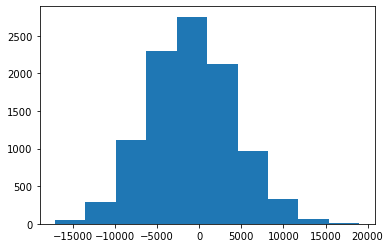

In [80]:
# Check winnings from random betting model, betting on 170 games with random 100 - 500 bets, incremented at 100

total_return_list = []
simulations = 10000

for i in range(simulations):
    gambling_sample = gambling_df.sample(n=175)
    gambling_sample['return'] = gambling_sample.apply(lambda x: get_return_prop_random(x), axis=1)
    total_return_list.append(gambling_sample.sum()['return'])

print('Average Random Return: {}'.format(np.mean(total_return_list)))

plt.plot()
plt.hist(total_return_list)
plt.show()

In [81]:
# Check where algorithm would have fallen in terms of random guessing percentile, for proportional betting

break_even_percentile = scipy.stats.percentileofscore(total_return_list, 0)
approx_algo_winnings = 6700
algo_percentile = scipy.stats.percentileofscore(total_return_list, approx_algo_winnings)

print('Percentile of breaking even: {}'.format(break_even_percentile))

print('Percentile of algorithm winnings: {}'.format(algo_percentile))

Percentile of breaking even: 58.35
Percentile of algorithm winnings: 93.33


In [82]:
max(total_return_list)

19009.190000000002

In [83]:
min(total_return_list)

-17141.559999999998